In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import multigrate as mtg
import scanpy as sc
import numpy as np
import pandas as pd

Global seed set to 0


In [3]:
sc.set_figure_params(dpi_save=300)

In [5]:
rna = sc.read('../../../data/neurips-cite/rna_hvg_batch.h5ad')
rna

AnnData object with n_obs × n_vars = 90261 × 4000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'dataset_id', 'genome', 'hvg', 'log1p', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
adt = sc.read('../../../data/neurips-cite/protein.h5ad')
adt

AnnData object with n_obs × n_vars = 90261 × 134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [7]:
adata = mtg.data.organize_multiome_anndatas(
    adatas = [[rna], [adt]],
    groups = [[0], [0]],
    layers = [['counts'], [None]],
    modality_lengths=[4000, 134],
)
adata

AnnData object with n_obs × n_vars = 90261 × 4134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'group'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    layers: 'counts'

In [8]:
mtg.model.MultiVAE.setup_anndata(
    adata,
    categorical_covariate_keys=['batch'],
    rna_indices_end=4000,
)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 90261 cells, 4134 vars, 1 batches,
         1 labels, and 0 proteins. Also registered 1 extra categorical covariates and 1 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


In [9]:
model = mtg.model.MultiVAE(
    adata, 
    modality_lengths=[4000, 134],
    losses=['nb', 'mse'],
    loss_coefs={'kl': 1e-5,
               'integ': 0,
               },
    z_dim=16,
    cond_dim=16,
    dropout=0.2,
    n_layers_encoders=[2, 2],
    n_layers_decoders=[2, 2],
)

In [10]:
model.train(max_epochs=200, lr=1e-3, batch_size=256)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 1/200:   0%|          | 1/200 [00:14<47:26, 14.30s/it, loss=1.29e+03, v_num=1]

Metric elbo_validation improved. New best score: 1271.561


Epoch 2/200:   1%|          | 2/200 [00:23<36:39, 11.11s/it, loss=1.22e+03, v_num=1]

Metric elbo_validation improved by 69.063 >= min_delta = 0.0. New best score: 1202.498


Epoch 3/200:   2%|▏         | 3/200 [00:31<31:36,  9.63s/it, loss=1.2e+03, v_num=1] 

Metric elbo_validation improved by 17.805 >= min_delta = 0.0. New best score: 1184.693


Epoch 4/200:   2%|▏         | 4/200 [00:39<29:52,  9.14s/it, loss=1.19e+03, v_num=1]

Metric elbo_validation improved by 9.140 >= min_delta = 0.0. New best score: 1175.554


Epoch 5/200:   2%|▎         | 5/200 [00:48<29:08,  8.97s/it, loss=1.17e+03, v_num=1]

Metric elbo_validation improved by 6.853 >= min_delta = 0.0. New best score: 1168.701


Epoch 6/200:   3%|▎         | 6/200 [00:56<28:34,  8.84s/it, loss=1.15e+03, v_num=1]

Metric elbo_validation improved by 4.540 >= min_delta = 0.0. New best score: 1164.161


Epoch 7/200:   4%|▎         | 7/200 [01:05<28:12,  8.77s/it, loss=1.15e+03, v_num=1]

Metric elbo_validation improved by 2.532 >= min_delta = 0.0. New best score: 1161.629


Epoch 8/200:   4%|▍         | 8/200 [01:14<27:55,  8.73s/it, loss=1.15e+03, v_num=1]

Metric elbo_validation improved by 2.694 >= min_delta = 0.0. New best score: 1158.935


Epoch 9/200:   4%|▍         | 9/200 [01:22<27:40,  8.69s/it, loss=1.13e+03, v_num=1]

Metric elbo_validation improved by 0.979 >= min_delta = 0.0. New best score: 1157.956


Epoch 10/200:   5%|▌         | 10/200 [01:30<26:31,  8.38s/it, loss=1.13e+03, v_num=1]

Metric elbo_validation improved by 2.199 >= min_delta = 0.0. New best score: 1155.757


Epoch 11/200:   6%|▌         | 11/200 [01:37<25:30,  8.10s/it, loss=1.13e+03, v_num=1]

Metric elbo_validation improved by 1.601 >= min_delta = 0.0. New best score: 1154.156


Epoch 12/200:   6%|▌         | 12/200 [01:45<24:54,  7.95s/it, loss=1.14e+03, v_num=1]

Metric elbo_validation improved by 0.557 >= min_delta = 0.0. New best score: 1153.599


Epoch 13/200:   6%|▋         | 13/200 [01:53<24:35,  7.89s/it, loss=1.13e+03, v_num=1]

Metric elbo_validation improved by 0.503 >= min_delta = 0.0. New best score: 1153.096


Epoch 14/200:   7%|▋         | 14/200 [02:01<24:39,  7.96s/it, loss=1.13e+03, v_num=1]

Metric elbo_validation improved by 0.169 >= min_delta = 0.0. New best score: 1152.927


Epoch 15/200:   8%|▊         | 15/200 [02:09<24:54,  8.08s/it, loss=1.13e+03, v_num=1]

Metric elbo_validation improved by 1.211 >= min_delta = 0.0. New best score: 1151.715


Epoch 16/200:   8%|▊         | 16/200 [02:17<24:24,  7.96s/it, loss=1.12e+03, v_num=1]

Metric elbo_validation improved by 0.552 >= min_delta = 0.0. New best score: 1151.163


Epoch 17/200:   8%|▊         | 17/200 [02:24<24:02,  7.88s/it, loss=1.13e+03, v_num=1]

Metric elbo_validation improved by 1.084 >= min_delta = 0.0. New best score: 1150.079


Epoch 18/200:   9%|▉         | 18/200 [02:33<24:32,  8.09s/it, loss=1.11e+03, v_num=1]

Metric elbo_validation improved by 0.349 >= min_delta = 0.0. New best score: 1149.730


Epoch 22/200:  11%|█         | 22/200 [03:08<25:17,  8.52s/it, loss=1.12e+03, v_num=1]

Metric elbo_validation improved by 0.676 >= min_delta = 0.0. New best score: 1149.054


Epoch 23/200:  12%|█▏        | 23/200 [03:16<25:10,  8.53s/it, loss=1.12e+03, v_num=1]

Metric elbo_validation improved by 0.290 >= min_delta = 0.0. New best score: 1148.765


Epoch 24/200:  12%|█▏        | 24/200 [03:25<25:04,  8.55s/it, loss=1.1e+03, v_num=1] 

Metric elbo_validation improved by 0.232 >= min_delta = 0.0. New best score: 1148.533


Epoch 29/200:  14%|█▍        | 29/200 [04:08<24:35,  8.63s/it, loss=1.11e+03, v_num=1]

Metric elbo_validation improved by 0.604 >= min_delta = 0.0. New best score: 1147.928


Epoch 32/200:  16%|█▌        | 32/200 [04:33<24:06,  8.61s/it, loss=1.11e+03, v_num=1]

Metric elbo_validation improved by 0.077 >= min_delta = 0.0. New best score: 1147.851


Epoch 36/200:  18%|█▊        | 36/200 [05:08<23:48,  8.71s/it, loss=1.1e+03, v_num=1] 

Metric elbo_validation improved by 0.111 >= min_delta = 0.0. New best score: 1147.741


Epoch 37/200:  18%|█▊        | 37/200 [05:17<23:37,  8.69s/it, loss=1.11e+03, v_num=1]

Metric elbo_validation improved by 0.098 >= min_delta = 0.0. New best score: 1147.643


Epoch 40/200:  20%|██        | 40/200 [05:43<23:21,  8.76s/it, loss=1.11e+03, v_num=1]

Metric elbo_validation improved by 0.548 >= min_delta = 0.0. New best score: 1147.095


Epoch 41/200:  20%|██        | 41/200 [05:52<23:08,  8.73s/it, loss=1.12e+03, v_num=1]

Metric elbo_validation improved by 0.331 >= min_delta = 0.0. New best score: 1146.763


Epoch 54/200:  27%|██▋       | 54/200 [07:40<21:16,  8.74s/it, loss=1.1e+03, v_num=1] 

Metric elbo_validation improved by 0.567 >= min_delta = 0.0. New best score: 1146.197


Epoch 62/200:  31%|███       | 62/200 [08:45<18:21,  7.98s/it, loss=1.1e+03, v_num=1] 

Metric elbo_validation improved by 0.018 >= min_delta = 0.0. New best score: 1146.179


Epoch 66/200:  33%|███▎      | 66/200 [09:20<19:01,  8.52s/it, loss=1.11e+03, v_num=1]

Metric elbo_validation improved by 0.029 >= min_delta = 0.0. New best score: 1146.150


Epoch 75/200:  38%|███▊      | 75/200 [10:29<16:03,  7.71s/it, loss=1.11e+03, v_num=1]

Metric elbo_validation improved by 0.217 >= min_delta = 0.0. New best score: 1145.933


Epoch 82/200:  41%|████      | 82/200 [11:26<16:10,  8.23s/it, loss=1.1e+03, v_num=1] 

Metric elbo_validation improved by 0.071 >= min_delta = 0.0. New best score: 1145.861


Epoch 87/200:  44%|████▎     | 87/200 [12:03<13:52,  7.36s/it, loss=1.11e+03, v_num=1]

Metric elbo_validation improved by 0.709 >= min_delta = 0.0. New best score: 1145.152


Epoch 99/200:  50%|████▉     | 99/200 [13:31<12:44,  7.57s/it, loss=1.09e+03, v_num=1]

Metric elbo_validation improved by 0.104 >= min_delta = 0.0. New best score: 1145.049


Epoch 102/200:  51%|█████     | 102/200 [13:57<13:23,  8.20s/it, loss=1.1e+03, v_num=1] 

Metric elbo_validation improved by 0.277 >= min_delta = 0.0. New best score: 1144.771


Epoch 118/200:  59%|█████▉    | 118/200 [16:04<11:32,  8.44s/it, loss=1.1e+03, v_num=1] 

Metric elbo_validation improved by 0.018 >= min_delta = 0.0. New best score: 1144.754


Epoch 131/200:  66%|██████▌   | 131/200 [17:50<08:58,  7.80s/it, loss=1.11e+03, v_num=1]

Metric elbo_validation improved by 0.084 >= min_delta = 0.0. New best score: 1144.669


Epoch 146/200:  73%|███████▎  | 146/200 [19:54<07:31,  8.36s/it, loss=1.09e+03, v_num=1]

Metric elbo_validation improved by 0.026 >= min_delta = 0.0. New best score: 1144.644


Epoch 156/200:  78%|███████▊  | 156/200 [21:14<06:00,  8.19s/it, loss=1.1e+03, v_num=1] 

Metric elbo_validation improved by 0.785 >= min_delta = 0.0. New best score: 1143.859


Epoch 200/200: 100%|██████████| 200/200 [27:14<00:00,  8.17s/it, loss=1.09e+03, v_num=1]


In [11]:
model.get_latent_representation(batch_size=256)
adata

AnnData object with n_obs × n_vars = 90261 × 4134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'group', 'size_factors', '_scvi_batch', '_scvi_labels'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi'
    obsm: '_scvi_extra_categoricals', '_scvi_extra_continuous', 'latent'
    layers: 'counts'

In [12]:
sc.pp.neighbors(adata, use_rep='latent')
sc.tl.umap(adata)

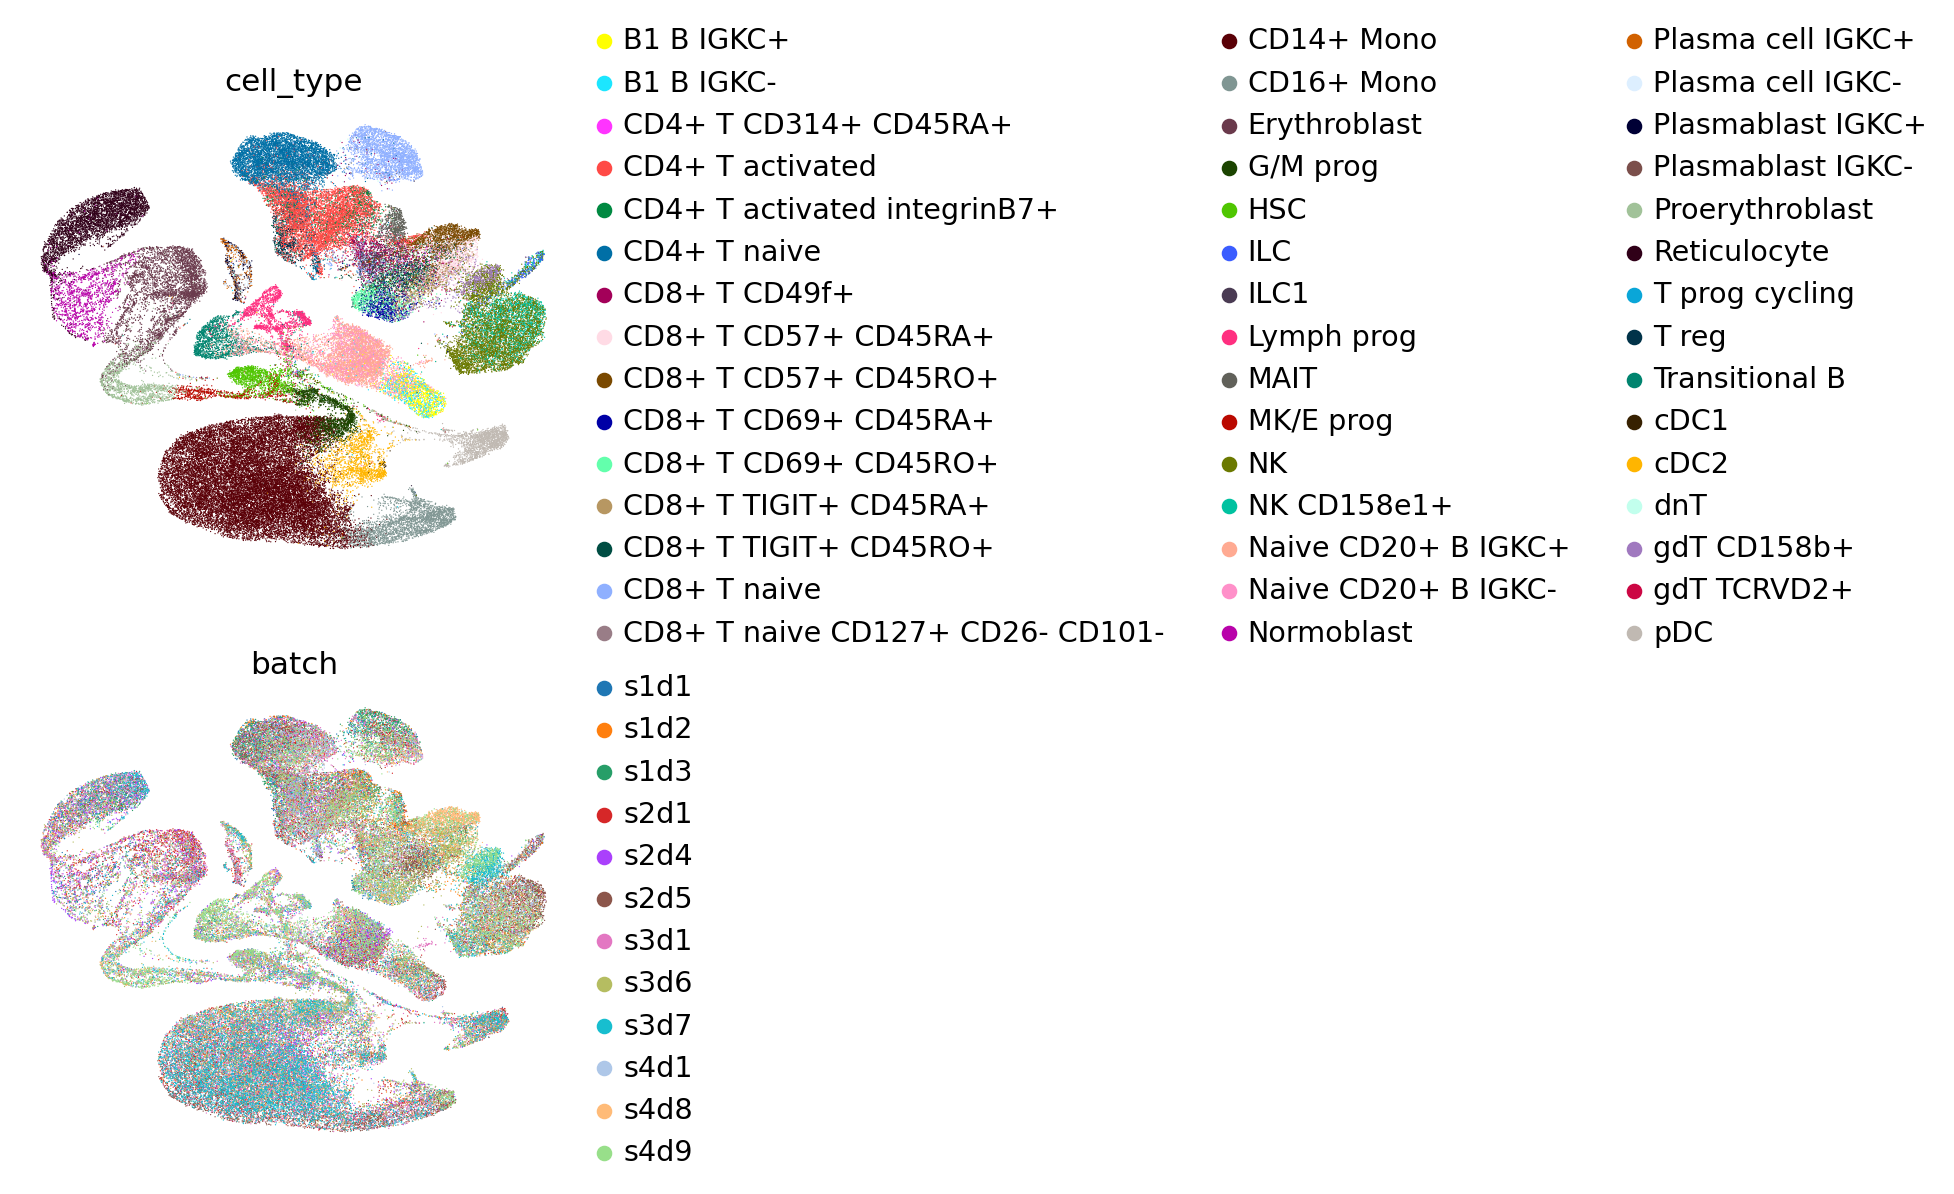

In [13]:
sc.pl.umap(adata, color=['cell_type', 'batch'], ncols=1, frameon=False, save='_multigrate_neurips_cite.png')

In [20]:
adata_ = sc.AnnData(adata.X)
adata_.obs = adata.obs.copy()
adata_.uns = adata.uns.copy()
adata_.obsm = adata.obsm.copy()
adata_.obsp = adata.obsp.copy()

In [21]:
adata_.write('multigrate_neurips_cite.h5ad')